## Zomato Data Analysis

## import libraries


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## create data frame


In [44]:
df = pd.read_csv(r'C:\Users\KIIT\Desktop\Projects\Zomato Data Analysis\Zomato data .csv', encoding='utf-8')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


## check for missing values

In [45]:
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

## convert the data type of column Rate

In [46]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Q1. What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'Type of Restaurant')

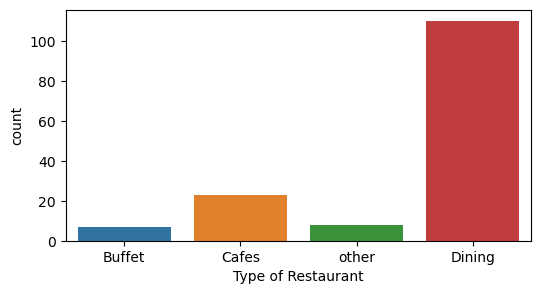

In [64]:
fig=plt.figure(figsize=(6,3))
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

## conclusion- Majority of restaurant falls in dining category.

## Q2. How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'No of Votes')

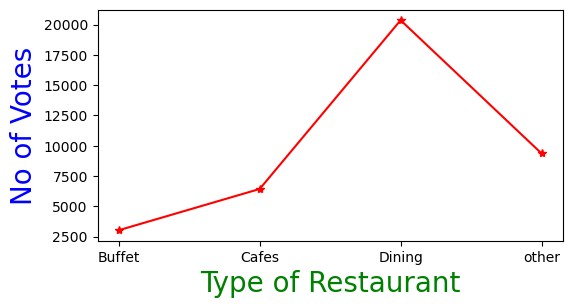

In [63]:
fig=plt.figure(figsize=(6,3))
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="red",marker="*")
plt.xlabel("Type of Restaurant",c="green",size=20)
plt.ylabel("No of Votes",c="blue",size=20)

## conclusion-Dining restaurant has received maximum votes

## Q3. What are the ratings that majority of restaurants have received?

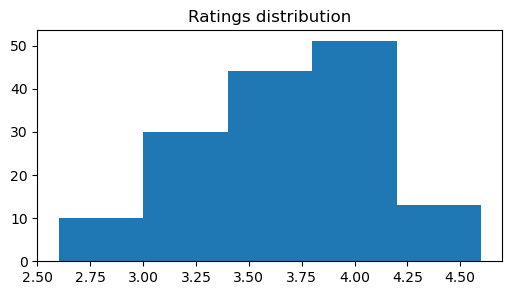

In [65]:
fig=plt.figure(figsize=(6,3))
plt.hist(df['rate'],bins=5)
plt.title("Ratings distribution")
plt.show()

## conclusion-Majority restaurant have received ratings from 3.5-4

## Q4. Zomato has observed that most couples order most of their food online. What is the average spending on each other?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

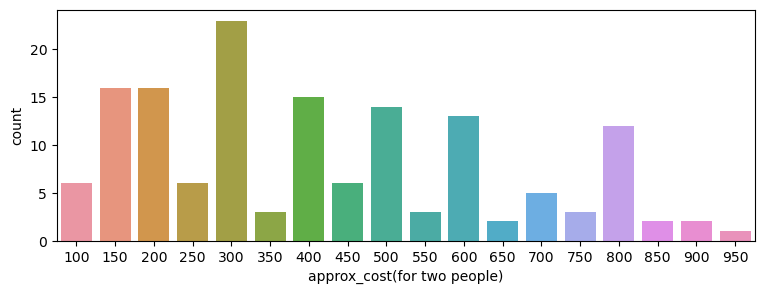

In [67]:
fig=plt.figure(figsize=(9,3))
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Conclusion - The average amount that couples spend on each other is an approximate cost of 300 rupees.

## Q5. Which mode has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

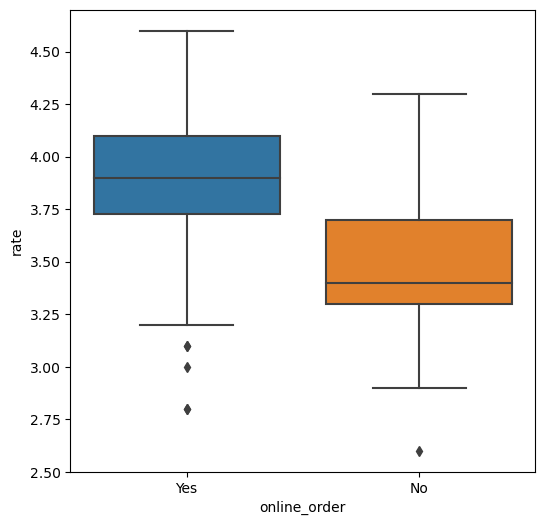

In [53]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order', y ='rate',data=df)

## Conclusion - Offline order received lower ratings in comparison to online order.

## Q6. Which type of restaurant received more offline orders, so that Zomato can predict customers with good offers?

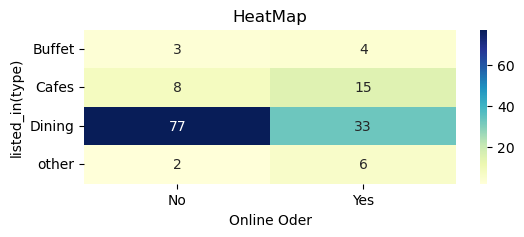

In [70]:
plt.figure(figsize=(6,2))

pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title('HeatMap')
plt.xlabel("Online Oder")
plt.ylabel("listed_in(type)")
plt.show()

## Conclusion - Dining Restaurants primarily accept offline orders,whereas cafes primarily receive online orders.
## This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at Cafes.

## Q7. How do cost and online ordering influence restaurant ratings?

Text(0.5, 1.0, 'Cost For Two vs Rating')

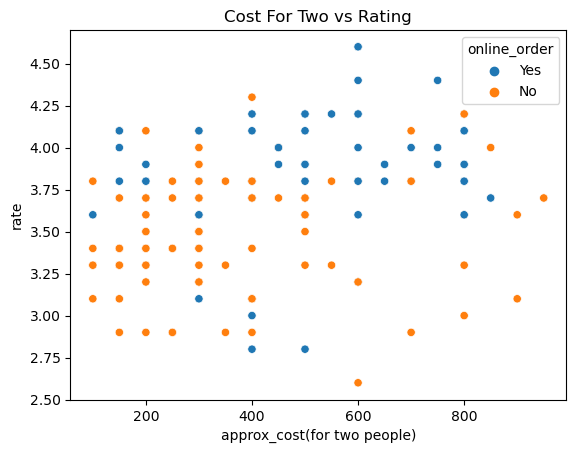

In [55]:
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate', hue='online_order')
plt.title('Cost For Two vs Rating')

## Conclusion- The analysis shows that cost for two people does not have a strong impact on restaurant ratings.
## High-rated restaurants can be both expensive and affordable, indicating that customers value more than just price — such as food quality, service, or ambiance.